In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [158]:
#import CSV file and create a data frame
data1 = pd.read_csv("AR-properties-rent.csv")
df1 = pd.DataFrame(data1)
df1.head(3) #to get insight into our data

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,dffaf4b5bba246af564311bc8e581f46224fed90,2017-01-01,rent,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0054771,-57.5426106",...,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/14mlf_alquiler_dep...,IMPECABLE DPTO DE DOS AMBIENTES MUY BI8EN UBIC...,Departamento en Alq x Temp. Ambientes. Dormitorio,https://thumbs4.properati.com/0/WqpavvtP_gtEOK...
1,d3a5f126c11e1cbf1534216ed25d45098799f018,2017-01-01,rent,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9963209,-57.5558638",...,NaN,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/14mlg_alquiler_dep...,LINDO DPTO DE TRES AMBIENTESCONSTA DE UN DORMI...,DPTO 3 AMBIENTES,https://thumbs4.properati.com/7/SDQAe2f69Ihyjp...
2,cf6dd05434caa0b5503d5df9e0380bfc589f955c,2017-01-01,rent,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9986983,-57.5460176",...,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/14mlh_alquiler_dep...,DEPARTAMENTO DE DOS AMBIENTES EN ZONA CENTRICA...,Departamento en Alq x Temp. Ambientes. Dormitorio,https://thumbs4.properati.com/4/rHhuqZTQmZ1d_P...


In [159]:
#drop unnecessary columns
df1 = df1[["state_name", "lat", "lon", "price_aprox_local_currency", "surface_covered_in_m2", "surface_total_in_m2"]]
df1.head(3)

,state_name,lat,lon,price_aprox_local_currency,surface_covered_in_m2,surface_total_in_m2
0,Buenos Aires Costa Atlántica,-38.005477,-57.542611,NaN,NaN,NaN
1,Buenos Aires Costa Atlántica,-37.996321,-57.555864,NaN,NaN,NaN
2,Buenos Aires Costa Atlántica,-37.998698,-57.546018,NaN,NaN,NaN


In [160]:
#drop rows with vacant value
df1.dropna(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 8 to 14941
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  6976 non-null   object 
 1   lat                         6976 non-null   float64
 2   lon                         6976 non-null   float64
 3   price_aprox_local_currency  6976 non-null   float64
 4   surface_covered_in_m2       6976 non-null   float64
 5   surface_total_in_m2         6976 non-null   float64
dtypes: float64(5), object(1)
memory usage: 381.5+ KB


In [161]:
#to get the unique values in state_name column
print(df1["state_name"].unique())

['Buenos Aires Interior' 'Capital Federal' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Buenos Aires Costa Atlántica' 'Córdoba'
 'Bs.As. G.B.A. Zona Norte' 'Tucumán' 'Santa Cruz' 'Misiones' 'Santa Fe'
 'Chubut' 'Corrientes' 'La Rioja' 'Río Negro' 'Mendoza' 'Neuquén'
 'Entre Ríos' 'San Luis' 'Tierra Del Fuego' 'Santiago Del Estero'
 'Catamarca' 'Salta' 'La Pampa']


In [162]:
#since the state_name values can be grouped into provinces, let's create a province column.
#Assign all values that belong to the Buenos Aires province 'Buenos Aires' and other provinces respectively. 
states = ['Buenos Aires Costa Atlántica', 'Buenos Aires Interior', 'Bs.As. G.B.A. Zona Oeste',
          'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Capital Federal'
         ]
df1["province"] = df1["state_name"].apply(lambda x: "Buenos Aires"
                                          if x in states else x)
df1.head(3)

,state_name,lat,lon,price_aprox_local_currency,surface_covered_in_m2,surface_total_in_m2,province
8,Buenos Aires Interior,-35.426407,-60.155125,7596.42,280.0,165.0,Buenos Aires
18,Capital Federal,-34.598016,-58.375351,7596.42,49.0,51.0,Buenos Aires
19,Capital Federal,-34.645575,-58.451073,25321.28,302.0,382.0,Buenos Aires


In [163]:
#drop unnecessary columns
df1.drop(columns= ["state_name", ], inplace=True)
df1.head(3)

,lat,lon,price_aprox_local_currency,surface_covered_in_m2,surface_total_in_m2,province
8,-35.426407,-60.155125,7596.42,280.0,165.0,Buenos Aires
18,-34.598016,-58.375351,7596.42,49.0,51.0,Buenos Aires
19,-34.645575,-58.451073,25321.28,302.0,382.0,Buenos Aires


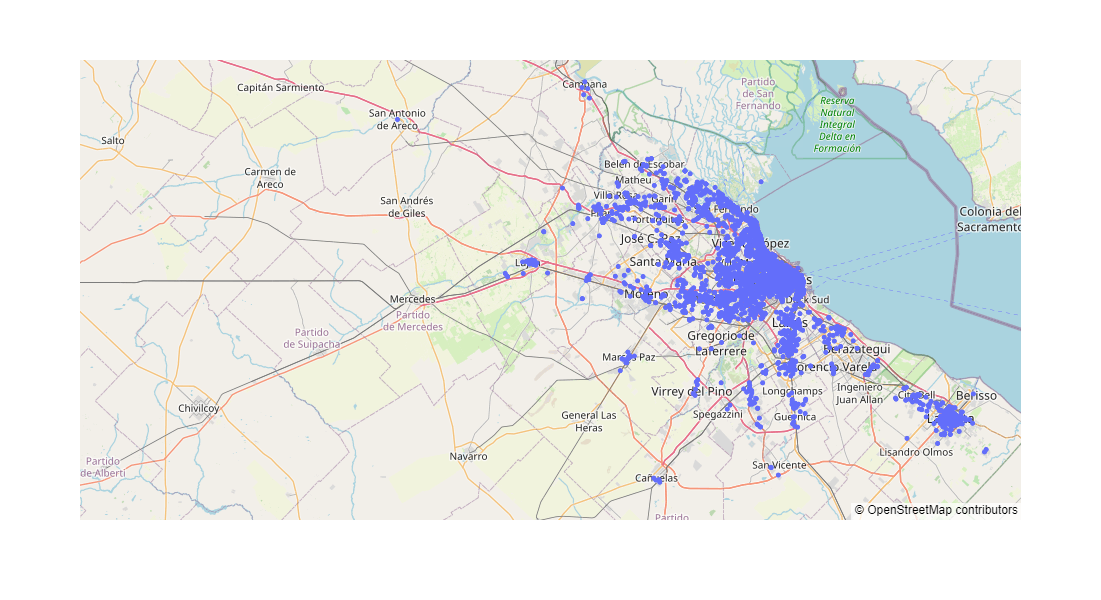

In [164]:
#visualize the province and approximate price in Argentine Pesos using a map 
fig = px.scatter_mapbox(
    df1,
    lat = "lat",
    lon = "lon",
    center = {
        "lat": -34.6305,
        "lon": -59.0534,
    },
    width = 1000,
    height = 600,
    hover_data = ["price_aprox_local_currency"],
)
fig.update_layout(
    mapbox_style = "open-street-map"
)
fig.show()

In [168]:
#create a two-column data frame to show the mean approximate price in Argentine Pesos per province
ndf = df1.groupby("province")["price_aprox_local_currency"].mean()
print(ndf.head())

province
Buenos Aires    27764.599602
Catamarca        5046.270000
Chubut          14190.671429
Corrientes       1620.470000
Córdoba         18145.175231
Name: price_aprox_local_currency, dtype: float64


In [169]:
#create a two-column data frame to show the mean surface covered in square meters per province
ndf1 = df1.groupby("province")["surface_covered_in_m2"].mean()
print(ndf1.head())

province
Buenos Aires    113.477890
Catamarca        40.000000
Chubut           61.785714
Corrientes       65.000000
Córdoba         105.425926
Name: surface_covered_in_m2, dtype: float64


In [170]:
#create a two-column data frame to show the mean price per surface covered for each province
price_per_m2 = ndf/ndf1
price_per_m2.head()

province
Buenos Aires    244.669685
Catamarca       126.156750
Chubut          229.675607
Corrientes       24.930308
Córdoba         172.113027
dtype: float64

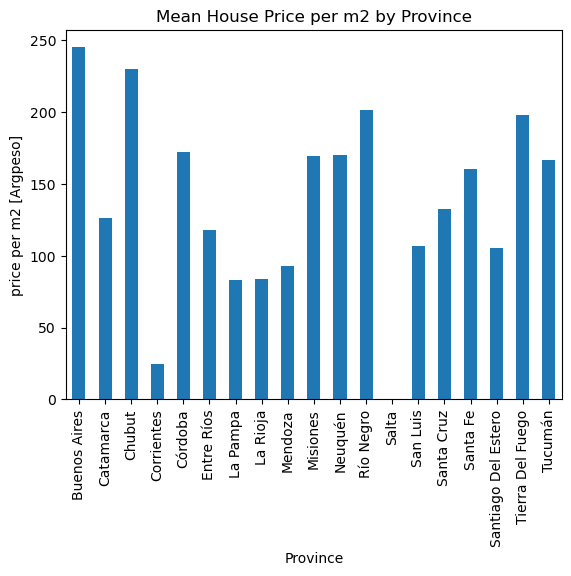

In [171]:
#visualize the Mean House Price per m2 by Province using a bar chart 
price_per_m2.plot(
    kind = "bar",
    title = "Mean House Price per m2 by Province",
    xlabel = "Province",
    ylabel = "price per m2 [Argpeso]",
);

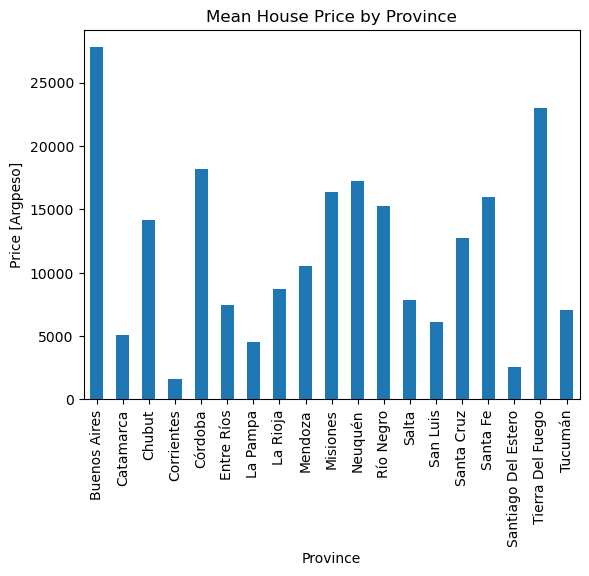

In [184]:
#visualize the mean House Price by Province using a bar chart 
ndf.plot(
    kind = "bar",
    title = "Mean House Price by Province",
    xlabel = "Province",
    ylabel = "Price [Argpeso]",
);

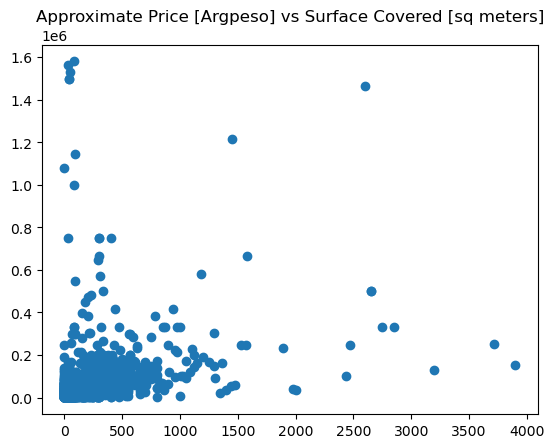

In [186]:
#visualize the approximate price [Argpeso] vs. surface covered [sq meters] using a scatter plot 
#import importlib to name the scatter plot
import importlib

importlib.reload(plt)

plt.scatter(
    x = df1["surface_covered_in_m2"],
    y = df1["price_aprox_local_currency"],
);
plt.xlabel = ("Price (Argpeso)")
plt.ylabel = ("Surface Covered (square meters)")
plt.title("Approximate Price [Argpeso] vs Surface Covered [sq meters]");

In [179]:
#Calculate the correlation between the Surface area covered [sq meter] and approximate Price [ArgPeso] for all provinces

province_correlation = df1["surface_covered_in_m2"].corr(df1["price_aprox_local_currency"])
print("The correlation between the Surface area covered [sq meter] and Price [ArgPeso] is:", province_correlation)
#If the correlation is less than 0.5, that means there's no relationship between the Surface area covered [sq meter] and approximate Price [ArgPeso]

The correlation between the Surface area covered [sq meter] and Price [ArgPeso] is: 0.4051043503354356


In [180]:
#extract and create a data frame for the Buenos Aires province 
df_buenos = df1[df1["province"] == "Buenos Aires"]
df_buenos.head()

,lat,lon,price_aprox_local_currency,surface_covered_in_m2,surface_total_in_m2,province
8,-35.426407,-60.155125,7596.42,280.0,165.0,Buenos Aires
18,-34.598016,-58.375351,7596.42,49.0,51.0,Buenos Aires
19,-34.645575,-58.451073,25321.28,302.0,382.0,Buenos Aires
20,-34.808946,-58.387863,5064.22,37.0,37.0,Buenos Aires
21,-34.796876,-58.393909,11141.39,20.0,20.0,Buenos Aires


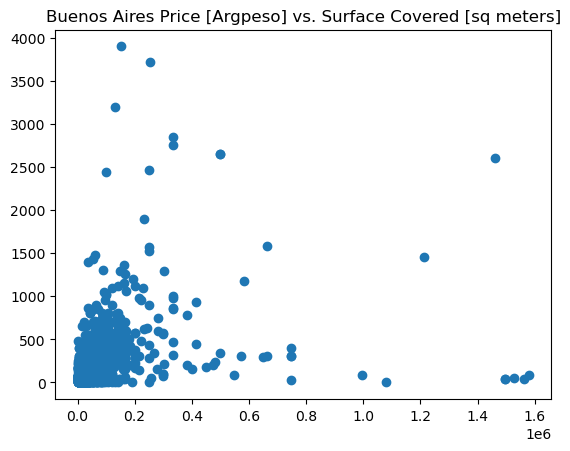

In [182]:
#visualize the Buenos Aires approximate price [Argpeso] vs. surface covered [sq meters] using a scatter plot
plt.scatter(
    x=df_buenos["price_aprox_local_currency"], 
    y=df_buenos["surface_covered_in_m2"]
);

plt.xlabel = ("Price [Argpeso]")
plt.ylabel = ("Surface Covered [square meters]")
plt.title("Buenos Aires Price [Argpeso] vs. Surface Covered [sq meters]");

In [183]:
#Calculate the correlation between the Surface area covered [sq meter] and the approximate Price [ArgPeso] for Buenos Aires

buenos_correlation = df_buenos["surface_covered_in_m2"].corr(df_buenos["price_aprox_local_currency"])
print("The correlation between the Surface area covered [sq meter] and Price [ArgPeso] for the Buenos Aires Province is:", buenos_correlation)
#If the correlation is less than 0.5, that means there's no relationship between the Surface area covered [sq meter] and approximate  Price [ArgPeso]

The correlation between the Surface area covered [sq meter] and Price [ArgPeso] for the Buenos Aires Province is: 0.42232896887195337
